# Activation functions
These are a critical component of artificial neural networks that enable them to learn complex tasks. They introduce non-linearity into the output of a neuron, which allows the neural network to model complex patterns in the data. Activation functions decide whether a neuron should be activated or not by calculating weighted sum of output+bias and applying non-linearity function on top of it.

Without activation function, a Neural network is just a linear-regression model.

Non-linearity of Activation functions make NN as Universal Approximators



# Properties of Activation Function:
* **Nonlinearity:** Activation functions introduce nonlinearity into the network, allowing neural networks to approximate complex, nonlinear relationships in data.
* **Continuity:** Activation functions should ideally be continuous to ensure smooth gradients during training, which helps in gradient-based optimization algorithms like backpropagation.
* **Monotonicity**: Monotonic activation functions preserve the order of input values, ensuring that increasing inputs result in increasing outputs or vice versa.
* **Boundedness**: Some activation functions are bounded, meaning they limit the range of output values. For example, sigmoid and tanh functions produce outputs in the range (0, 1) and (-1, 1), respectively.
* **Differentiability**: Activation functions need to be differentiable to compute gradients during training. While some functions like ReLU are not differentiable at specific points, they are subdifferentiable and can be used effectively.
* **Zero-Centered:** Some activation functions, like tanh, are zero-centered, which can help in training deep networks by preventing vanishing gradient problems.
Sparsity: Activation functions like ReLU induce sparsity in neural activations by setting some units to zero, which can be beneficial for model efficiency.
* **Smoothness:** Smooth activation functions ensure that small changes in input lead to small changes in output, aiding convergence during training.
Parameterization: Some activation functions have parameters that can be learned during training, such as the leaky ReLU's slope or the swish function's beta.
* **Efficiency:** Activation functions should be computationally efficient to allow for fast forward and backward passes during training and inference.
* **Robustness to Vanishing/Exploding Gradients:** Suitable activation functions help mitigate gradient-related problems like vanishing or exploding gradients.
* **Interpretability:** In some cases, interpretable activation functions like the sigmoid function are preferred when the model's outputs need to be easily understood as probabilities or percentages.

In [3]:
import numpy as np
from matplotlib import pyplot as plt


In [4]:
def plot_function(xseries,output,deriv,ylabel):
    plt.plot(xseries,output,'blue',label = ylabel)
    plt.plot(xseries,deriv,'green',label = 'Derivative')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.xlabel('X (input) ')
    plt.ylabel(ylabel)
    plt.legend(loc ="upper left")
    plt.show()


# [1] Step Function

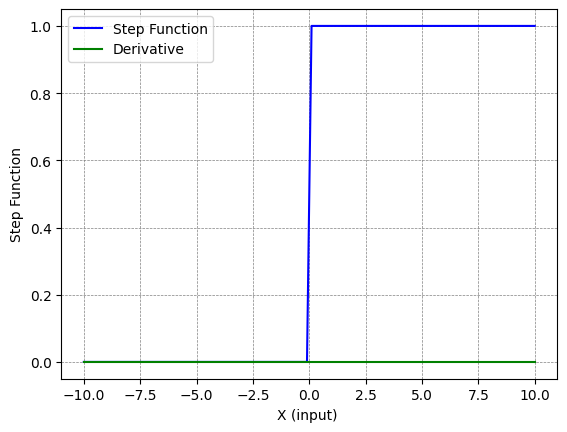

In [8]:
def step_function(x):

    return np.array([1 if num>=0 else 0 for num in x ]),np.array([0]*len(x))

xseries = np.linspace(-10,10,100)
output,deriv = step_function(xseries)
plot_function(xseries,output,deriv,'Step Function')



#[2] Sigmoid Function
* The sigmoid function, also known as the logistic function, is a mathematical function that maps any real-valued number to a value between 0 and 1.
* It is characterized by an S-shaped curve and is commonly used in machine learning and neural networks for tasks like binary classification and smoothing values.
* The sigmoid function takes any real number as input and "squashes" it to a value between 0 and 1.

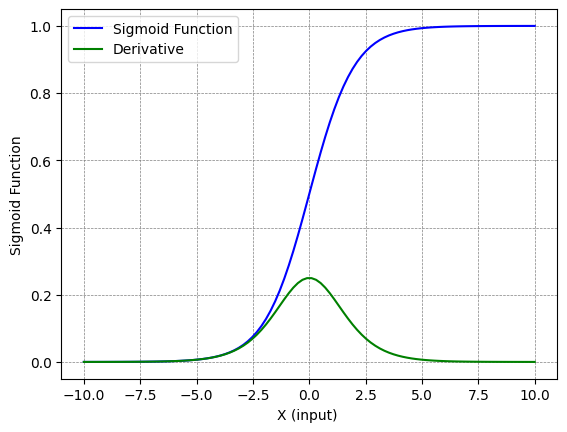

In [ ]:

'''
σ(x) = 1 / (1 + e^(-x))
'''

def sigmoid_function(x):
    sigma = 1 / (1 + np.exp(-1*x))
    deriv = sigma*(1-sigma)
    return sigma,deriv

xseries = np.linspace(-10,10,100)
output,deriv = sigmoid_function(xseries)
plot_function(xseries,output,deriv,'Sigmoid Function')


# [3] TanH Activation

* The hyperbolic tangent function, often abbreviated as "tanh," is a mathematical function that maps any real-valued number to a value between -1 and 1.
* It is similar to the sigmoid function but has an output range from -1 to 1

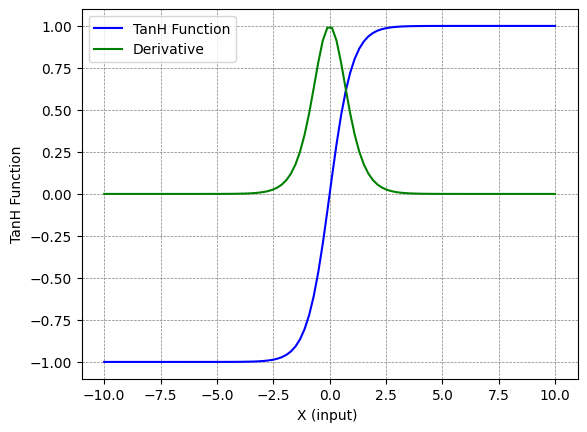

In [ ]:
'''
tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
'''

def tanh_function(x):
    tanh = (np.exp(x)-np.exp(-1*x))/(np.exp(x)+np.exp(-1*x))
    deriv = 1-tanh**2
    return tanh, deriv

xseries = np.linspace(-10,10,100)
output,deriv = tanh_function(xseries)
plot_function(xseries,output,deriv,'TanH Function')


# [4] Softmax Activation

In [4]:
'''
p_i = e^(z_i) / (e^(z_1) + e^(z_2) + ... + e^(z_n))
'''

def softmax_function(x):

    # Calculate the exponential of each element
    exp_x = np.exp(x)

    # Calculate the sum of exponentials for normalization
    sum_exp_x = np.sum(exp_x)

    # Compute softmax probabilities
    softmax_probs = exp_x / sum_exp_x

    return softmax_probs

xseries = [0.1,0.8,0.9,-0.2]
output = softmax_function(xseries)

print(output)


[0.16722095 0.33674165 0.37215707 0.12388033]


# [5] ReLU Activation

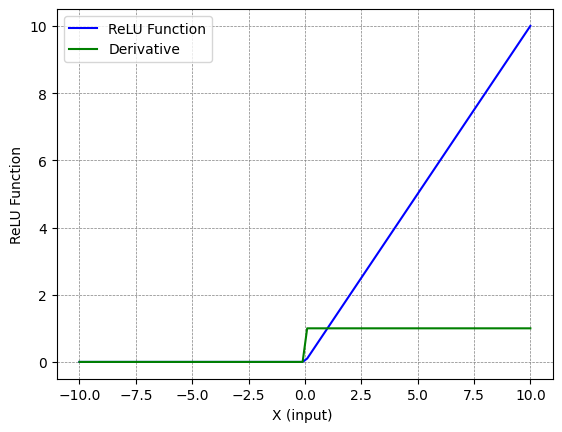

In [ ]:
'''
f(x) = max(0, x)
'''

def ReLU_function(x):
    relu = np.maximum(0,x)
    deriv = np.where(x > 0, 1, 0)
    return relu,deriv

xseries = np.linspace(-10,10,100)
output,deriv = ReLU_function(xseries)
plot_function(xseries,output,deriv,'ReLU Function')

#[6] Maxout Activation

In [ ]:
import numpy as np

def maxout(x, weights, biases):
    num_linear_transforms = len(weights)
    linear_outputs = [np.dot(x, weights[i]) + biases[i] for i in range(num_linear_transforms)]
    return np.max(linear_outputs, axis=0)

def maxout_derivative(x, weights, biases):

    num_linear_transforms = len(weights)
    linear_outputs = [np.dot(x, weights[i]) + biases[i] for i in range(num_linear_transforms)]
    max_index = np.argmax(linear_outputs, axis=0)

    # Create a mask for selecting the linear transformation with the maximum output
    mask = np.zeros_like(linear_outputs[0])
    mask[max_index] = 1

    # Derivative is 1 for the selected linear transformation, 0 for others
    return mask



#[7] Softplus Activation

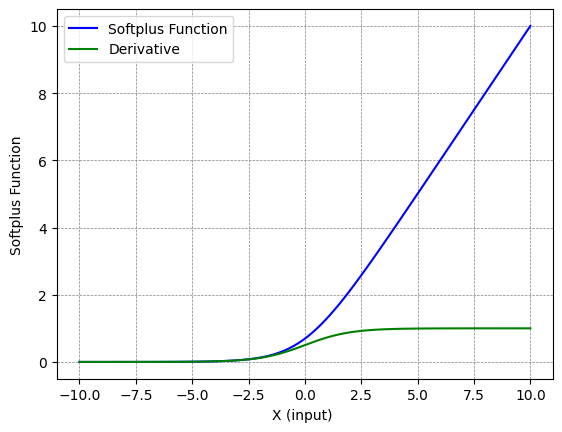

In [ ]:
'''
f(x) = ln(1 + e^x)
'''

def softplus_function(x):
    output = np.log(1 + np.exp(x))
    deriv = 1 / (1 + np.exp(-x))
    return output,deriv

xseries = np.linspace(-10,10,100)
output,deriv = softplus_function(xseries)
plot_function(xseries,output,deriv,'Softplus Function')


# [8] Swish Activation

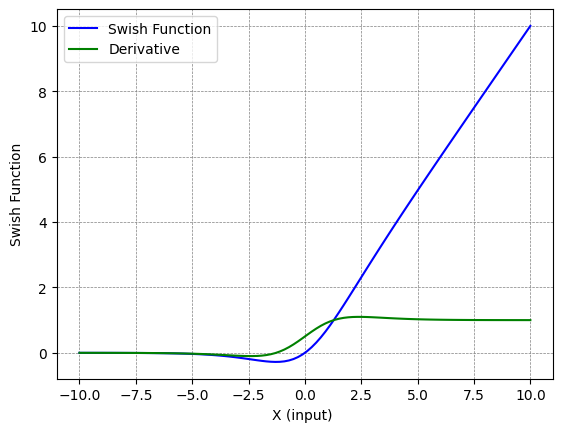

In [ ]:
'''
f(x) = x * sigmoid(x)
'''


def swish_function(x):

    sigmoid_x = 1/(1 + np.exp(-x))

    output = x * sigmoid_x

    deriv = x*sigmoid_x*(1-sigmoid_x) + sigmoid_x

    return output,deriv

xseries = np.linspace(-10,10,100)
output,deriv = swish_function(xseries)
plot_function(xseries,output,deriv,'Swish Function')




# [9] Mish

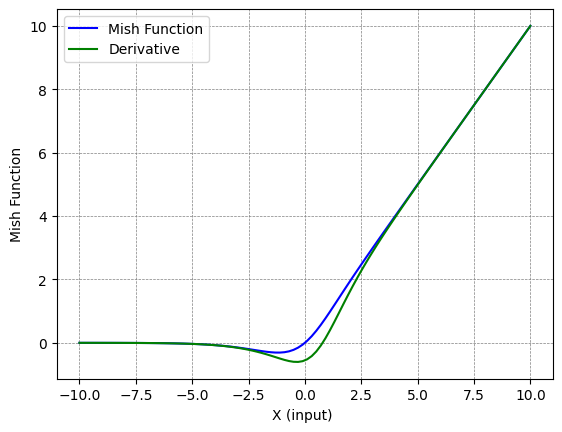

In [ ]:
import numpy as np

def mish_function(x):

    exp_x = np.exp(x)
    softplus_x = np.log(1 + exp_x)
    output = x * np.tanh(softplus_x)

    sech2_x = 1 / np.cosh(softplus_x)
    deriv = x * np.tanh(softplus_x) + sech2_x * (np.exp(x) * (x * np.tanh(softplus_x) - softplus_x))

    return output,deriv

xseries = np.linspace(-10,10,100)
output,deriv = mish_function(xseries)
plot_function(xseries,output,deriv,'Mish Function')


# [10] Other Variants of ReLU

ReLU is a default choice of developers due to its simplicity, computational efficiency and capacity to model complex relationships. However, despite its numerous advantages, ReLU has its limitations that have led to the development of several variants.

Following approaches can be followed to resolve the cons of ReLU:
* Introduce a small slope for negative values, preventing neurons from becoming entirely inactive. eg. Leaky ReLU (LReLU), Parametric ReLU (PReLU), and Randomized Leaky ReLU (RReLU)
* Offer a zero-centered form. eg. Exponential Linear Unit (ELU) and Scaled Exponential Linear Unit (SELU)

## [10.1] LReLU(Leaky Relu)

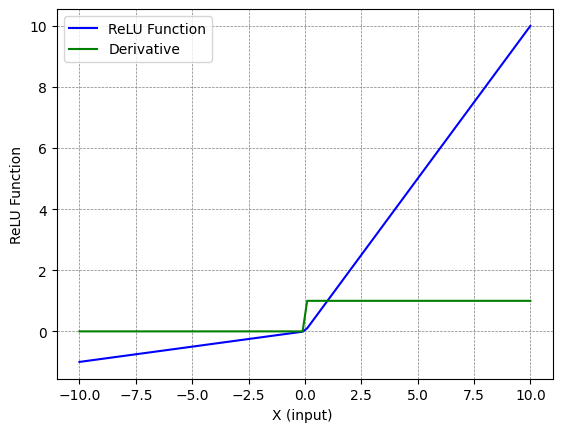

In [9]:
'''
f(x) = max(0, x)
'''

def LReLU_function(x, alpha = 0.1):
    relu = np.maximum(alpha*x,x)
    deriv = np.where(x > 0, 1, 0)
    return relu,deriv

xseries = np.linspace(-10,10,100)
output,deriv = ReLU_function(xseries)
plot_function(xseries,output,deriv,'ReLU Function')


## [10.2] PReLU (Parametric ReLU)

PReLU is similar to Leaky ReLU but allows 'alpha' to be learned during training. PReLU introduces a learnable parameter 'alpha' for each neuron, enabling the network to adapt the slope of the activation function.

## [10.3] RReLU (Randomised ReLU)

RReLU is similar to Leaky ReLU but allows 'alpha' to be a random value from a distribution.

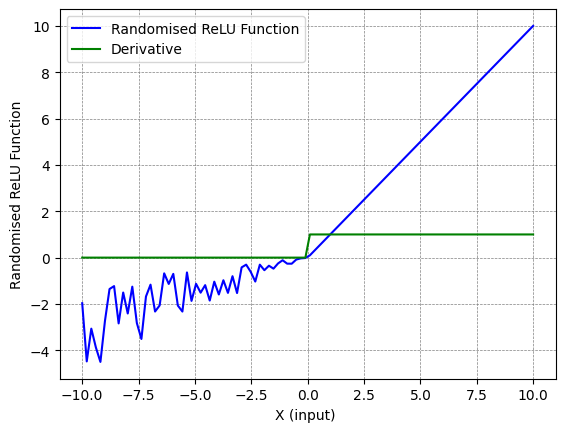

In [5]:
import numpy as np

def RReLU_function(x, alpha_min = 0.1, alpha_max = 0.5):
    alpha = np.random.uniform(alpha_min,alpha_max,size=x.shape)
    relu = np.maximum(alpha*x,x)
    deriv = np.where(x > 0, 1, 0)
    return relu,deriv

xseries = np.linspace(-10,10,100)
output,deriv = RReLU_function(xseries,0.1,0.5)
plot_function(xseries,output,deriv,'Randomised ReLU Function')

## [10.4] ELU (Exponential ReLU)



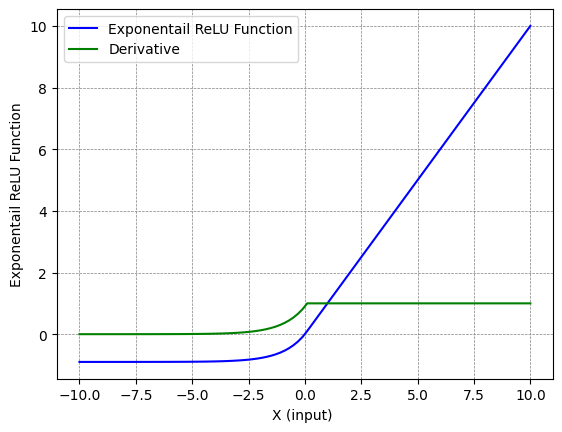

In [10]:
import numpy as np

def ELU(x, alpha=0.9):
    ELU = np.where(x>0,x,alpha*(np.exp(x)-1))
    deriv = np.where(x>0,1,alpha*np.exp(x))
    return ELU,deriv

xseries = np.linspace(-10,10,100)
output,deriv = ELU(xseries)
plot_function(xseries,output,deriv,'Exponentail ReLU Function')
